### Setting seeds of reproducibility

In [2]:
# Setting seeds of reproducibility 
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

### Checking if GPU is connected or not

In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Importing the Dependencies

In [4]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models

In [5]:
!pip install kaggle

In [6]:
kaggle_credentials = json.load(open('kaggle.json'))

In [7]:
os.environ['KAGGLE_USERNAME'] = kaggle_credentials["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentials["key"]

In [ ]:
#!/bin/bash
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

^C


Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
with ZipFile("plantvillage-dataset.zip",'r') as zip_ref:
    zip_ref.extractall()

In [9]:
base_dir = "plantvillage dataset/color"

In [10]:
img_size = 224
batch_size = 32

In [11]:
data_gen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

In [13]:
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size,img_size),
    batch_size = batch_size,
    subset = 'training',
    class_mode = 'categorical'
)

Found 43456 images belonging to 38 classes.


In [14]:
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size,img_size),
    batch_size = batch_size,
    subset = 'validation',
    class_mode = 'categorical'
)

Found 10849 images belonging to 38 classes.


In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(img_size,img_size,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(train_generator.num_classes,activation='softmax'))


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 256)               4

In [17]:
import scipy

In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples//batch_size,
    epochs = 5,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples//batch_size 
)

Epoch 1/5
1358/1358 [==============================] - 82s 56ms/step - loss: 0.9566 - accuracy: 0.7396 - val_loss: 0.4607 - val_accuracy: 0.8587
Epoch 2/5
1358/1358 [==============================] - 74s 54ms/step - loss: 0.2609 - accuracy: 0.9173 - val_loss: 0.4615 - val_accuracy: 0.8621
Epoch 3/5
1358/1358 [==============================] - 78s 58ms/step - loss: 0.1232 - accuracy: 0.9605 - val_loss: 0.4786 - val_accuracy: 0.8686
Epoch 4/5
1358/1358 [==============================] - 72s 53ms/step - loss: 0.0852 - accuracy: 0.9728 - val_loss: 0.6897 - val_accuracy: 0.8343
Epoch 5/5
1358/1358 [==============================] - 72s 53ms/step - loss: 0.0600 - accuracy: 0.9817 - val_loss: 0.7009 - val_accuracy: 0.8517


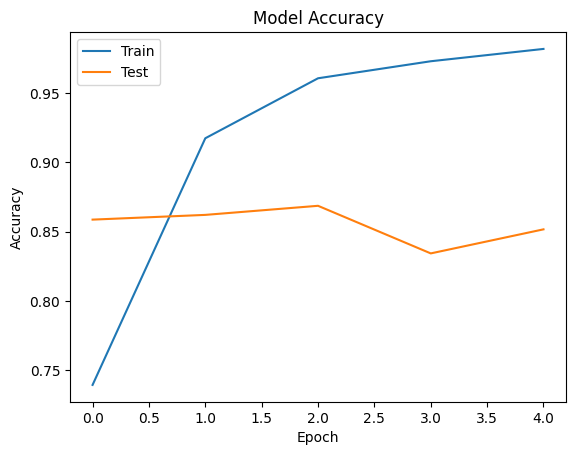

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

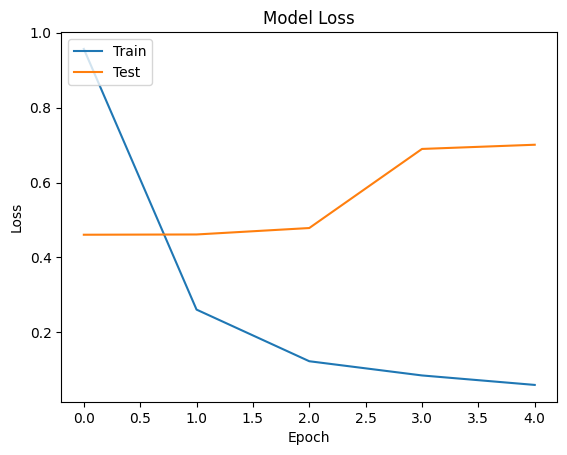

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [23]:
def load_and_preprocess_img(image_path, target_size=(224,224)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array,axis=0)
    img_array = img_array.astype('float32')/255.
    return img_array

In [24]:
def predict_image_class(model, image_path, class_indices):
    preprocessed = load_and_preprocess_img(image_path)
    prediction = model.predict(preprocessed)
    class_index = np.argmax(prediction, axis=1)[0]
    class_name = class_indices[class_index]
    return class_name

In [25]:
class_indices = {v:k for k,v in train_generator.class_indices.items()}

In [26]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [27]:
json.dump(class_indices,open('class_indices.json','w'))

In [28]:
image_path = "test_apple_black_rot.JPG"
ans = predict_image_class(model,image_path,class_indices)
print(ans)

1/1 [==============================] - 0s 333ms/step
Apple___Black_rot


In [29]:
model.save('./trained_models/plant_disease_prediction.h5')